In [1]:
ci = "jZPg1j9pWP-K0kY0TRg82w" #your client id
cs = "RFDW7YgIq9YkSYomer46h5EUC8pMcQ" #your client secret
ua = "hltassignment1" #your user agent name
# sub = "worldnews" #the name of the subreddit (not including the 'r/')
sub = "news"
# sub = "books"
# sub = "movies"

In [2]:
import praw
from praw.models import MoreComments
import requests
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)


with open(sub+".txt", "w", encoding = "utf-8") as f:
    
    #on the following line you can change top to any of the previously mentioned ways of sorting 
    #and the limit to however many posts you would like to extract (here we extract just 10).
    for post in reddit.subreddit(sub).top(limit=10): 
        
        #this line collects the post titles
        f.write(post.title+"\n")
        
        #this line collects the post content
        f.write(post.selftext+"\n")
        
        #this section collects the comments
        for comment in post.comments:
            if isinstance(comment, MoreComments):
                continue
            f.write(comment.body+"\n")

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [3]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())

In [4]:
txt = load_txt(sub+'.txt')

In [5]:
print(txt[:])

Joe Biden elected president of the United States  As you all celebrate or commiserate, please help us out by reporting comments that spread misinformation or incite violence.  A few facts for you all:  * Voter fraud is incredibly rare. The conservative Heritage Foundation [looked for fraud](https://thehill.com/opinion/civil-rights/494649-the-voter-fraud-fraud) over a 36-year period and could only find [1285 cases out of nearly two billion votes cast](https://www.brookings.edu/blog/fixgov/2020/09/21/voter-fraud-fears-and-mail-worries-grab-headlines-but-the-wait-will-be-the-worry-in-2020/) - a rate of 0.00007%.  * There are election observers in every room where ballots are counted and there are livestreams of most of these counting areas. Yes, this includes Philadelphia, where the Trump Campaign had to [admit in court that they had observers in the room.](https://twitter.com/alanfeuer/status/1324484846857658368)  * Mail-in ballots are legal votes. Those ballots must be cast and post-mar

['Joe', 'Biden', 'elected', 'president', 'of', 'the', 'United', 'States', 'As', 'you', 'all', 'celebrate', 'or', 'commiserate', ',', 'please', 'help', 'us', 'out', 'by', 'reporting', 'comments', 'that', 'spread', 'misinformation', 'or', 'incite', 'violence', '.', 'A']
['joe', 'biden', 'elected', 'president', 'of', 'the', 'united', 'states', 'as', 'you', 'all', 'celebrate', 'or', 'commiserate', 'please', 'help', 'us', 'out', 'by', 'reporting', 'comments', 'that', 'spread', 'misinformation', 'or', 'incite', 'violence', 'a', 'few', 'facts']
[('the', 814), ('to', 546), ('a', 515), ('and', 498), ('i', 437), ('of', 425), ('it', 300), ('in', 297), ('that', 291), ('is', 252)]


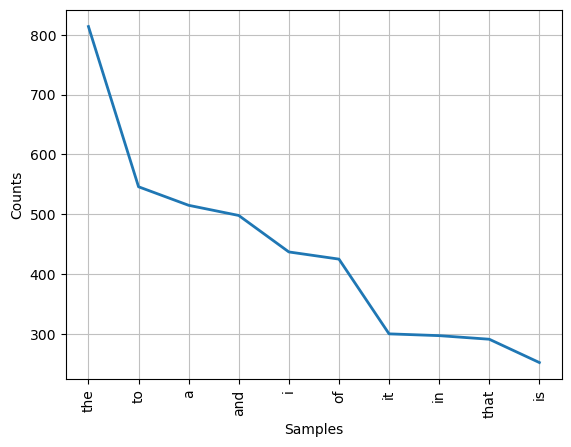

['joe', 'biden', 'elect', 'presid', 'unit', 'state', 'celebr', 'commiser', 'pleas', 'help', 'us', 'report', 'comment', 'spread', 'misinform', 'incit', 'violenc', 'fact', 'voter', 'fraud']
[('one', 87), ('like', 86), ('go', 79), ('fuck', 67), ('http', 62), ('peopl', 62), ('rip', 61), ('time', 61), ('would', 57), ('year', 56)]


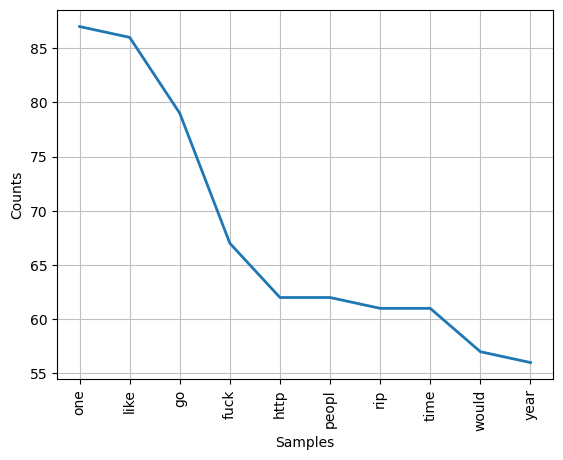

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
tokens = nltk.word_tokenize(txt)
print(tokens[:30])

tokens_processed = [t.lower() for t in tokens if t.isalnum()]
print(tokens_processed[:30])

fd = nltk.FreqDist(tokens_processed)
print(fd.most_common(10))

fd.plot(10)


from nltk.corpus import stopwords
tokens_filtered = [t for t in tokens_processed if t not in stopwords.words('english')]

porter = nltk.PorterStemmer()
tokens_stemmed = [porter.stem(w) for w in tokens_filtered]

print(tokens_stemmed[:20]) #print the first 20 stemmed words

fd = nltk.FreqDist(tokens_stemmed)
print(fd.most_common(10))
fd.plot(10)

In [7]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [8]:
orig = lexical_diversity(tokens_processed)
pre = lexical_diversity(tokens_filtered)

print("Original:", orig)
print("Pre-Processed", pre)

Original: 0.17960791850855276
Pre-Processed 0.33497766195085626
